In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
torch.__version__

'1.8.0'

# CUDA

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device(0)

In [5]:
torch.cuda.get_device_name()

'GeForce GTX 1050'

In [6]:
cuda_0 = torch.device('cuda:0')

In [7]:
a = torch.ones( 3 , 2 , device=cuda_0 )
b = torch.ones( 3 , 2 , device=cuda_0 )
c = a + b

In [8]:
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [9]:
%%time
for i in range(10):
    a = np.random.randn( 10000 , 10000 )
    b = np.random.randn( 10000 , 10000 )
    np.add( b , a)

CPU times: user 1min 2s, sys: 15.5 s, total: 1min 17s
Wall time: 1min 19s


In [10]:
%%time
for i in range(10):
    a_cpu = torch.randn( [ 10000 , 10000 ] )
    b_cpu = torch.randn( [ 10000 , 10000 ] )
    c_cpu = a_cpu + b_cpu

CPU times: user 23.2 s, sys: 8.2 s, total: 31.4 s
Wall time: 27.2 s


In [11]:
%%time
for i in range(10):
    a_gpu = torch.randn( [ 10000 , 10000 ] , device=cuda_0 )
    b_gpu = torch.randn( [ 10000 , 10000 ] , device=cuda_0 )
    c_gpu = a_gpu + b_gpu

CPU times: user 69.4 ms, sys: 61.4 ms, total: 131 ms
Wall time: 1.06 s


# Automatic Differentiation

In [23]:
x = torch.ones( [ 3 , 2 ] , requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [24]:
y = x + 5
y

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)

In [25]:
z = y*y +1
z

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)

In [27]:
t = torch.sum(z)
t

tensor(222., grad_fn=<SumBackward0>)

In [28]:
t.backward()

In [29]:
x.grad

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])

In [30]:
x = torch.ones( [ 3 , 2 ] , requires_grad=True )
y = x + 5
r = 1 / ( 1 + torch.exp(-y) )
print(r)
s = torch.sum(r)
s.backward()
print(x.grad)

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [38]:
x = torch.ones( [ 3 , 2 ] , requires_grad=True )
y = x + 5
r = 1 / ( 1 + torch.exp(-y) )
a = torch.ones([3,2])
r.backward(a)
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


$a$ could be a derivative

# Autograd

In [15]:
x = torch.randn( [ 20 , 1] , requires_grad=True )
y = 3 *x + 2

In [16]:
w = torch.tensor( [ 1. ] , requires_grad=True )
b = torch.tensor( [ 1. ] , requires_grad=True )

y_hat = w*x + b

loss = torch.sum( ( y_hat - y ) **2 )

In [17]:
loss

tensor(188.1597, grad_fn=<SumBackward0>)

In [18]:
loss.backward()

In [19]:
w.grad

tensor([-154.3193])

In [20]:
b.grad

tensor([-67.6808])

$\frac{\partial{s}}{\partial{x}} = \frac{\partial{s}}{\partial{r}} \cdot \frac{\partial{r}}{\partial{x}}$

For the above code $a$ represents $\frac{\partial{s}}{\partial{r}}$ and then $x.grad$ gives directly $\frac{\partial{s}}{\partial{x}}$


# Autograd with Forward , Backward Propogation

In [41]:
%%time
learning_rate = 0.01

device = None

w = torch.tensor( [ 1. ] , requires_grad=True , device=device )
b = torch.tensor( [ 1. ] , requires_grad=True , device=device )

print('Starting : ' , w.item() , b.item() )

n = 20

for i in range(n):
    
    x = torch.randn( [ 20 , 1] )
    y = 3 * x - 2
    
    y_hat = w * x + b
    loss = torch.sum( ( y_hat - y )** 2 )
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        w.grad.zero_()
        b.grad.zero_()
        
    print(  w.item() , b.item() )

Starting :  1.0 1.0
1.4098182916641235 0.1924843192100525
1.5852357149124146 -0.468031644821167
2.71315860748291 -1.308665156364441
2.8688604831695557 -1.6041388511657715
2.8921682834625244 -1.748051643371582
2.9132697582244873 -1.841395616531372
2.9511756896972656 -1.904434323310852
2.959111452102661 -1.9402400255203247
2.9716811180114746 -1.9595019817352295
2.983246326446533 -1.976658821105957
2.9901397228240967 -1.9854142665863037
2.993152141571045 -1.990230679512024
2.998385429382324 -1.9956653118133545
2.9985780715942383 -1.9971637725830078
2.999053716659546 -1.9982314109802246
2.99945330619812 -1.9989629983901978
2.999814033508301 -1.999474048614502
2.9998903274536133 -1.99968421459198
2.999929189682007 -1.9998116493225098
2.999941825866699 -1.9998793601989746
CPU times: user 31.9 ms, sys: 11.2 ms, total: 43.1 ms
Wall time: 28.6 ms


# Explanation :

The wrapper with `torch.no_grad()` temporarily sets all of the requires_grad flags to false. An example is from the official PyTorch tutorial.

```
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)
```

**Output :**

```
True
True
False
```
`w,grad,zero_()` makes w.grad to zero


In [42]:
%%time
learning_rate = 0.01

device = cuda_0

w = torch.tensor( [ 1. ] , requires_grad=True , device=device )
b = torch.tensor( [ 1. ] , requires_grad=True , device=device )

print('Starting : ' , w.item() , b.item() )

n = 20

for i in range(n):
    
    x = torch.randn( [ 20 , 1] , device=device )
    y = 3 * x - 2
    
    y_hat = w * x + b
    
    loss = torch.sum( ( y_hat - y )** 2 )
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        w.grad.zero_()
        b.grad.zero_()
        
    print(  w.item() , b.item() )

Starting :  1.0 1.0
1.8256499767303467 -0.05741584300994873
2.2781052589416504 -0.878343403339386
2.7538704872131348 -1.3120226860046387
2.8849616050720215 -1.6064823865890503
2.889132499694824 -1.7502328157424927
2.946479082107544 -1.8520303964614868
2.9452455043792725 -1.9072072505950928
2.9607014656066895 -1.9438629150390625
2.974148988723755 -1.9679038524627686
2.979536533355713 -1.9784362316131592
2.990246295928955 -1.9855152368545532
2.9916324615478516 -1.9907915592193604
2.993164539337158 -1.9937095642089844
2.9948012828826904 -1.995800495147705
2.995643377304077 -1.9972916841506958
2.9965240955352783 -1.997893214225769
2.997504949569702 -1.9982913732528687
2.9989044666290283 -1.9987988471984863
2.9994888305664062 -1.9993531703948975
2.999709129333496 -1.999577522277832
CPU times: user 160 ms, sys: 68.2 ms, total: 228 ms
Wall time: 119 ms


In [44]:
%%time
learning_rate = 0.01
N = 1000000
epochs = 2000

device = None

w = torch.rand( [N] , requires_grad=True , device=device )
b = torch.rand( [1] , requires_grad=True , device=device )

print( torch.mean(w).item() , b.item()   )

for i in range(epochs):
    
    x = torch.randn( [N] )
    y = torch.dot( 3 * torch.ones( [N] ) , x ) - 2
    
    y_hat = torch.dot( w , x ) + b
    loss = torch.sum( ( y_hat - y ) ** 2 )
    
    loss.backward()
    
    with torch.no_grad():
        
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
        w.grad.zero_()
        b.grad.zero_()
        
    print( torch.mean(w).item() , b.item() )
    

0.500104546546936 0.03855156898498535
0.5216993689537048 -33.2037467956543
0.7225112915039062 283.40142822265625
9.14799976348877 -12814.8046875
57.798439025878906 -132715.21875
1932.2493896484375 -1689222.25
61923.1015625 32581442.0
79084.484375 -18943386.0
862240.1875 -2406184704.0
-74764176.0 -53060427776.0
1137653120.0 2443810701312.0
17686206464.0 -20500346568704.0
62618759168.0 -59820463882240.0
-82733441024.0 165897943646208.0
6122857562112.0 -5402805791621120.0
-130704033710080.0 -1.5123442278649037e+17
-3840399500115968.0 -5.918688684504252e+18
6.585726328530534e+16 1.1004805174223962e+20
-8.639725288869069e+17 1.7960755008420467e+21
1.5158087202845491e+19 3.2062870892106167e+22
-7.990889870862057e+19 2.771059086113543e+23
-2.436035319041534e+21 -6.520864222253275e+23
3.503595371131219e+22 -3.615817095268192e+25
4.25942301241376e+22 -1.630133239770491e+26
1.9701945568445714e+24 1.4786312374977588e+27
1.5981092308899293e+25 -2.360693295912225e+28
-6.69315316290516e+26 -4.496576

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
CPU times: user 2min 37s, sys: 1min 5s, total: 3min 42s
Wall time: 49.3 s


# With pytorch -> Model

In [25]:
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

sns.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [26]:
torch.manual_seed(0)

In [27]:
my_cmap = 'nipy_spectral'

In [28]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [29]:
np.unique(labels)

array([0, 1, 2, 3])

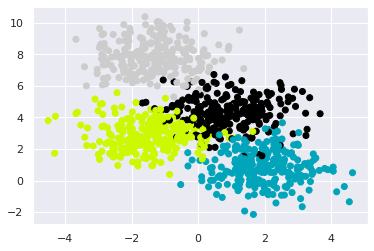

In [30]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


## Using torch tensors and autograd

In [32]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [33]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


# Explanation : for sigmoid

In [34]:
a = torch.rand([2, 4])
print(a)
print(a.exp())
print(a.exp().sum())
print(a.exp().sum(0))
print(a.exp().sum(-1))
print(a.exp().sum(-1).unsqueeze(-1))

tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964]])
tensor([[1.6426, 2.1559, 1.0925, 1.1411],
        [1.3599, 1.8853, 1.6325, 2.4509]])
tensor(13.3607)
tensor([3.0025, 4.0412, 2.7250, 3.5920])
tensor([6.0321, 7.3285])
tensor([[6.0321],
        [7.3285]])


In [35]:
def softmax(a):
    return  a.exp()/a.exp().sum(-1).unsqueeze(-1) 

In [36]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = softmax(a2) # (N, 4)
  return h2

# Explanation : for loss

In [37]:
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])

y = torch.tensor([2, 0])

(-y_hat[range(y_hat.shape[0]), y].log()).mean().item()

(torch.argmax(y_hat, dim=1) == y).float().mean().item()

0.5

In [38]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [39]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

# Training 

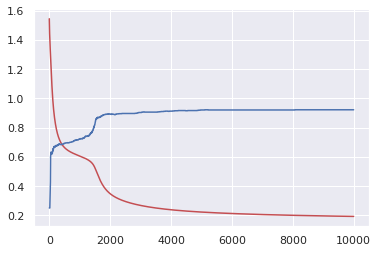

Loss before training 1.5456440448760986
Loss after training 0.19288595020771027


In [40]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

# Training :  Using NN.Functional

In [42]:
import torch.nn.functional as F

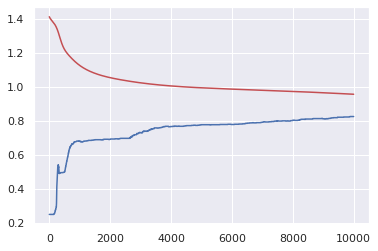

Loss before training 1.4111980199813843
Loss after training 0.9561843872070312


In [43]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

# Training : Using NN.Parameter

In [44]:
import torch.nn as nn

In [45]:
class FirstNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
    
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [46]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

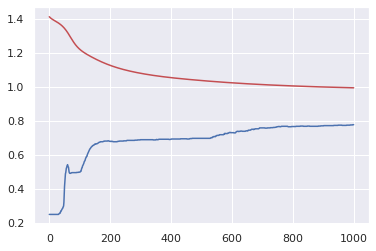

Loss before training 1.4111980199813843
Loss after training 0.9939236640930176


In [47]:
fn = FirstNetwork()
fit()

# Training : Using NN.Linear and Optim

In [60]:
class FirstNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)
    
  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    
    # softmax
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    
    return h2

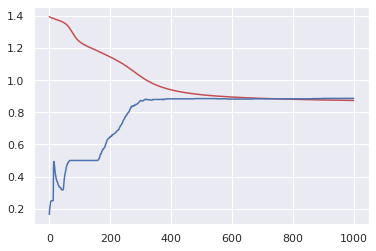

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [49]:
fn = FirstNetwork_v1()
fit()

# Fit() function : Version 1

In [50]:
from torch import optim

In [51]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

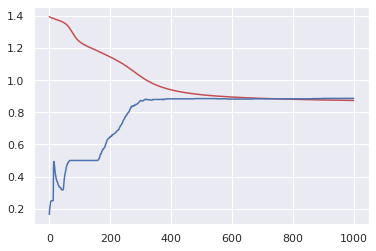

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [52]:
fn = FirstNetwork_v1()
fit_v1()

# Training : Using NN.Sequential

In [53]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

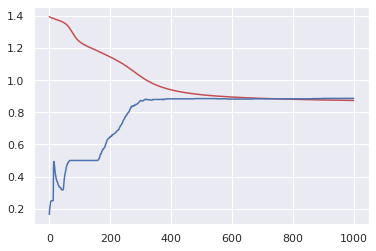

Loss before training 1.395160436630249
Loss after training 0.8738409876823425


In [54]:
fn = FirstNetwork_v2()
fit_v1()

# fit() function : Version 2

In [55]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()

In [56]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.8738409876823425

# Running it on GPUs

In [57]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.395159363746643
Time taken 16.93718957901001


In [58]:
class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4), 
        nn.Sigmoid(), 
        nn.Linear(1024*4, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [59]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890224695205688
Time taken 22.480128526687622


## Exercises

1. Try out a deeper neural network, eg. 2 hidden layers
2. Try out different parameters in the optimizer (eg. try momentum, nestrov) -> check `optim.SGD` docs
3. Try out other optimization methods (eg. RMSProp and Adam) which are supported in `optim`
4. Try out different initialisation methods which are supported in `nn.init` 